In [2]:
## KAGGLE INFO
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
## install and load packages

# install.packages("prob", repos="http://R-Forge.R-project.org")
# install.packages("ggpubr")
# library(prob)
# library("ggpubr")
# library(tidyverse) # metapackage of all tidyverse packages
# # ap <- available.packages()
# # ap
# # install.packages('prob')


In [19]:
library(tidyverse)
## Read Data And Give Summary: 
diabetes_df <- read_csv("../input/diabetes-dataset/diabetes.csv")
## Maybe impute the 0s to mean
# # getting median of each column using apply()
# db_df_missing_mean <- apply(diabetes_df, 2, mean, na.rm=TRUE)

# # imputing median value with NA
# for(i in colnames(diabetes_df))
#     diabetes_df[,i][is.na(diabetes_df[,i])] <- db_df_missing_mean[i]

print(diabetes_df)
summary(diabetes_df)
## Standard Deviation and variance
print(sd(diabetes_df$Age))
print(var(diabetes_df$Age))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 768 × 9
   Pregnancies Glucose BloodPressure SkinT…¹ Insulin   BMI Diabe…²   Age Outcome
         <dbl>   <dbl>         <dbl>   <dbl>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
 1           6     148            72      35       0  33.6   0.627    50       1
 2           1      85            66      29       0  26.6   0.351    31       0
 3           8     183            64       0       0  23.3   0.672    32       1
 4           1      89            66      23      94  28.1   0.167    21       0
 5           0     137            40      35     168  43.1   2.29     33       1
 6           5     116            74       0       0  25.6   0.201    30       0
 7           3      78            50      32      88  31     0.248    26       1
 8          10     115             0       0       0  35.3   0.134    29       0
 9           2     197            70      45     543  30.5   0.158    53       1
10           8     125            96       0       0   0     0.232    54       1
# … with

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

[1] 11.76023
[1] 138.303


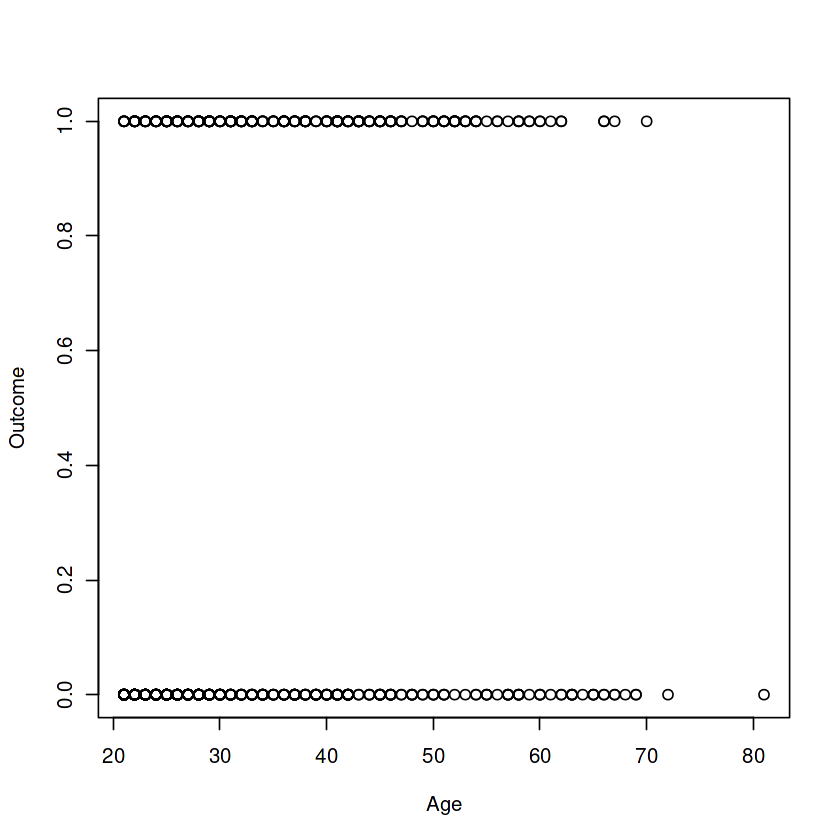

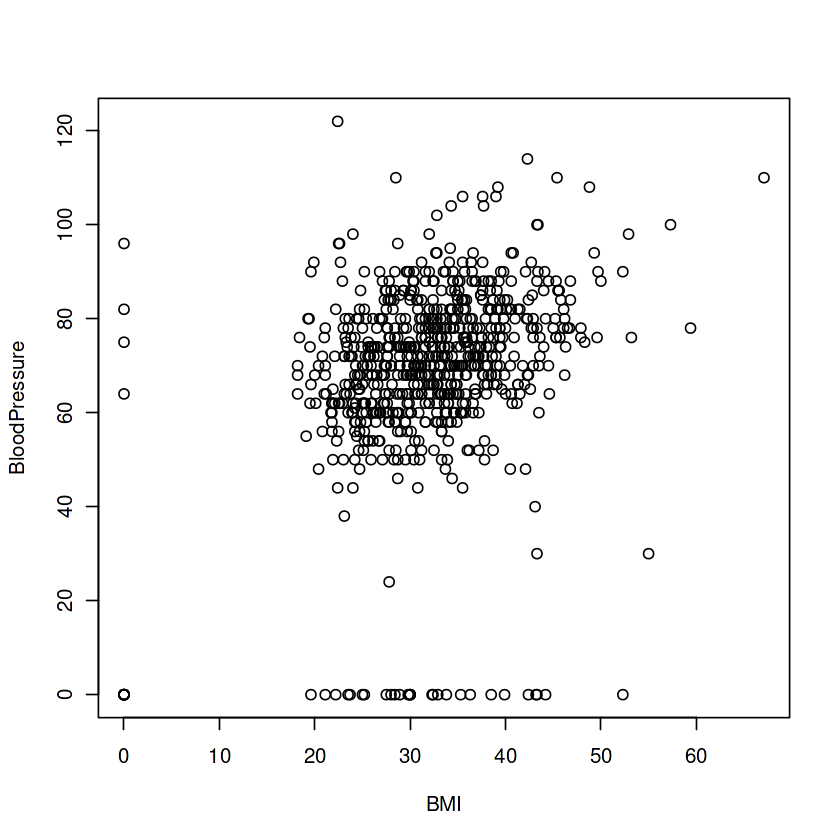

In [17]:
## Plotting
# X_p <- diabetes_df %>% select(Age)
# Y_p <- diabetes_df %>% select(Outcome)
# plot(x = X_p, y = Y_p)
plot(Outcome ~ Age,data=diabetes_df)
plot(BloodPressure ~ BMI, data=diabetes_df)

In [6]:
## Conditional Probability
library(prob)
library("ggpubr")
#diabetes_two_way_table <- addmargins(table("Outcome"=diabetes_df$Outcome,"Age"=diabetes_df$Age))
diabetes_df <- probspace(diabetes_df)
# P(Has diabetes | Age > 45 & BloodPressure > 75)
Prob(diabetes_df, event=Outcome == 1, given=(Age > 25 & BloodPressure > mean(BloodPressure)))


ERROR: Error in library(prob): there is no package called ‘prob’


In [21]:
#Chi-square independence testing
chiq_test_age <- chisq.test(table(diabetes_df$Outcome, diabetes_df$Age),simulate.p.value = TRUE)
#summary(chiq_test_age)
print(chiq_test_age)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  table(diabetes_df$Outcome, diabetes_df$Age)
X-squared = 140.94, df = NA, p-value = 0.0004998



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



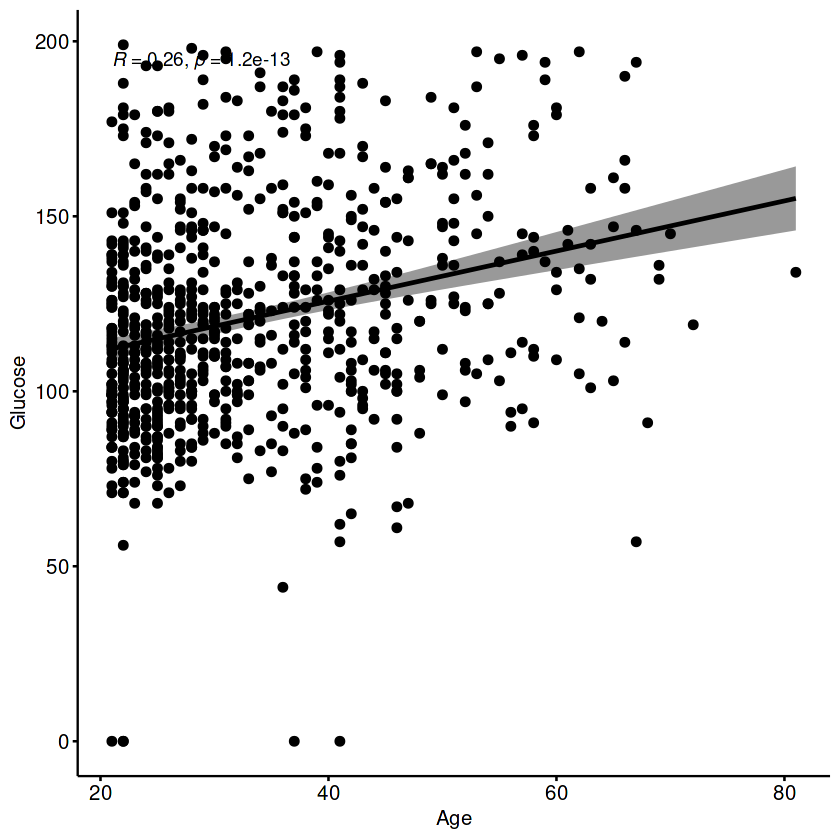

[1] 0.2635143


	Pearson's product-moment correlation

data:  diabetes_df$Age and diabetes_df$Glucose
t = 7.5604, df = 766, p-value = 1.15e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1964320 0.3281413
sample estimates:
      cor 
0.2635143 


	Pearson's product-moment correlation

data:  diabetes_df$Age and diabetes_df$Outcome
t = 6.7927, df = 766, p-value = 2.21e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1704865 0.3039745
sample estimates:
     cor 
0.238356 



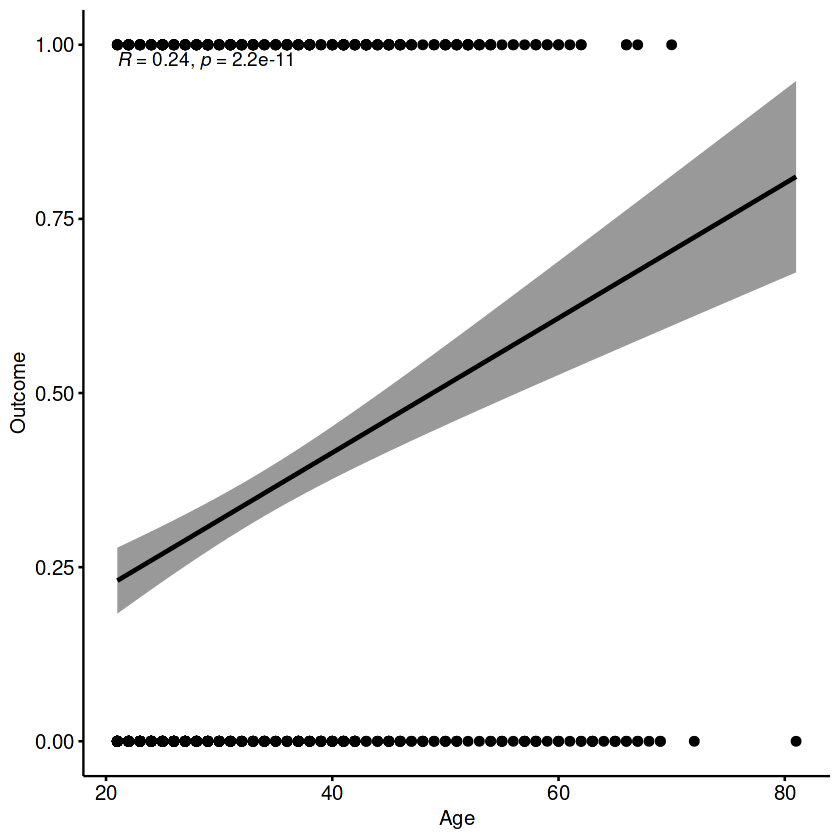

In [22]:
## Correlation Stuff

## Idea - look at correlation between other variables not just the outcome
## Concern - Will the Outcome being binary class be an issue, how to visualize data
## Find correlation between Variable and %of class (probability distribution function), continuous for the binary which can be used possibly for correlation?
library("ggpubr")
ggscatter(diabetes_df, x = "Age", y = "Glucose", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Age", ylab = "Glucose")
ggscatter(diabetes_df, x = "Age", y = "Outcome", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Age", ylab = "Outcome")
cor(diabetes_df$Age, diabetes_df$Glucose, method = c("pearson", "kendall", "spearman"))
cor_test <- cor.test(diabetes_df$Age, diabetes_df$Glucose, method=c("pearson", "kendall", "spearman"))
print(cor_test)

#cor(diabetes_df$Age, diabetes_df$Outcome, method = c("pearson", "kendall", "spearman"))
cor_test2 <-cor.test(diabetes_df$Age, diabetes_df$Outcome, method=c("pearson", "kendall", "spearman"))
print(cor_test2)


In [ ]:
## Linear Regression Model (can use this for the other variables too)
linear_model <- lm(formula = Outcome ~ Age,data=diabetes_df)
summary(linear_model)
plot(Outcome ~ Age,data=diabetes_df)
abline(linear_model)


Call:
glm(formula = "Outcome ~ .", family = "binomial", data = diabetes_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5566  -0.7274  -0.4159   0.7267   2.9297  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.4046964  0.7166359 -11.728  < 2e-16 ***
Pregnancies               0.1231823  0.0320776   3.840 0.000123 ***
Glucose                   0.0351637  0.0037087   9.481  < 2e-16 ***
BloodPressure            -0.0132955  0.0052336  -2.540 0.011072 *  
SkinThickness             0.0006190  0.0068994   0.090 0.928515    
Insulin                  -0.0011917  0.0009012  -1.322 0.186065    
BMI                       0.0897010  0.0150876   5.945 2.76e-09 ***
DiabetesPedigreeFunction  0.9451797  0.2991475   3.160 0.001580 ** 
Age                       0.0148690  0.0093348   1.593 0.111192    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family take

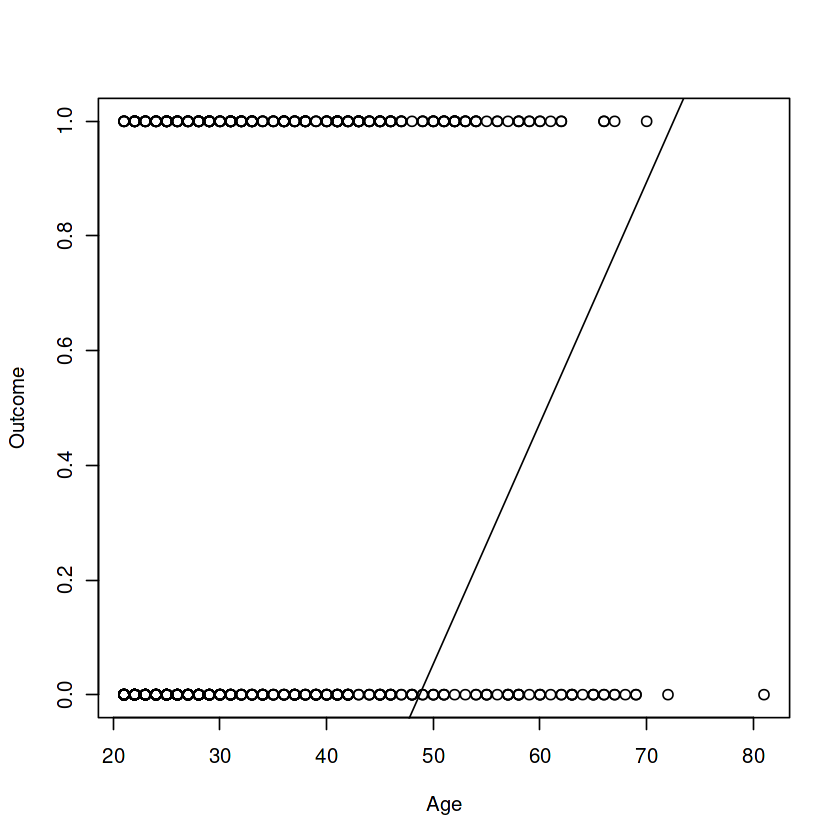

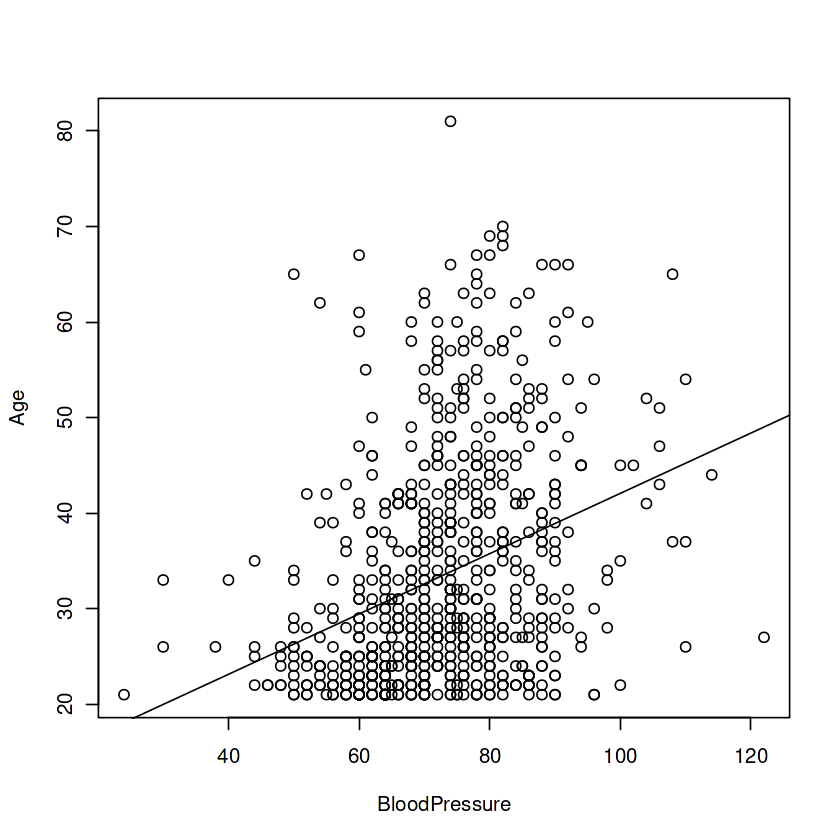

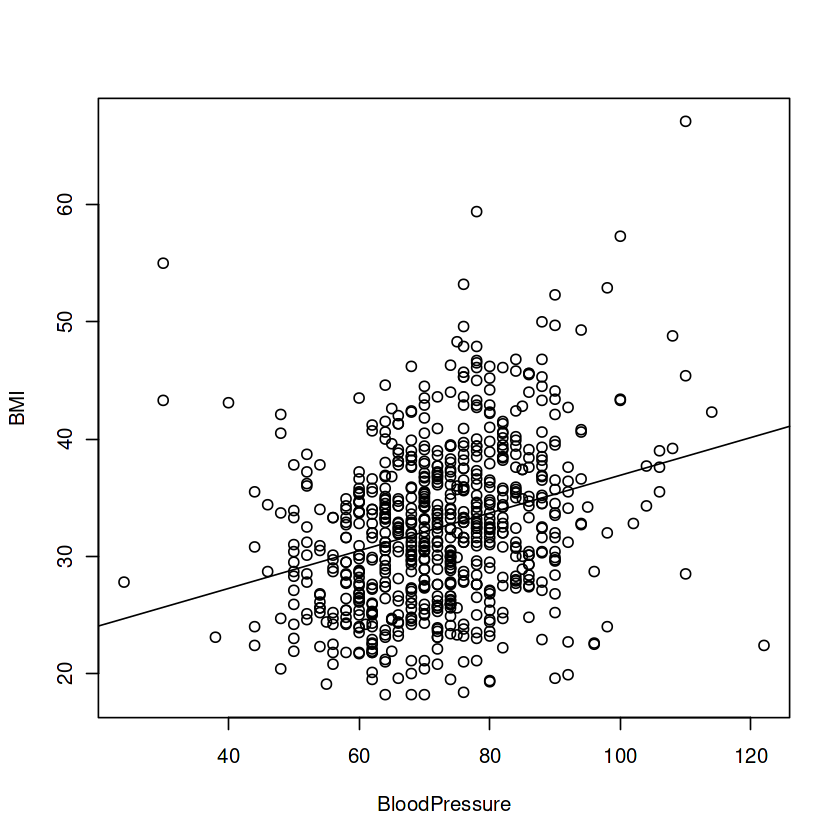

In [16]:
## General Linear Model
#help("glm")
glm_model <- glm(formula = "Outcome ~ .",family="binomial",data=diabetes_df)

(coefs <- summary(glm_model))

df_with_nans <- diabetes_df
#df1$count[df1$count == 0] <- NA
for(i in colnames(df_with_nans))
    if(i != "Outcome")
        df_with_nans[,i][df_with_nans[,i] == 0] <- NA
glm_model_plotable <- glm(formula = "Outcome ~ Age",family="binomial",data=df_with_nans)
plot(Outcome ~ Age,data=df_with_nans)
abline(glm_model_plotable)

#mtcars[which(mtcars$am>0),]
glm_model_plotable2 <- glm(formula = "Age ~ BloodPressure",family="gaussian",data=df_with_nans)
plot(Age ~ BloodPressure,data=df_with_nans)
abline(glm_model_plotable2)

glm_model_plotable3 <- glm(formula = "BMI ~ BloodPressure",family="gaussian",data=df_with_nans)
plot(BMI ~ BloodPressure,data=df_with_nans)
abline(glm_model_plotable3)

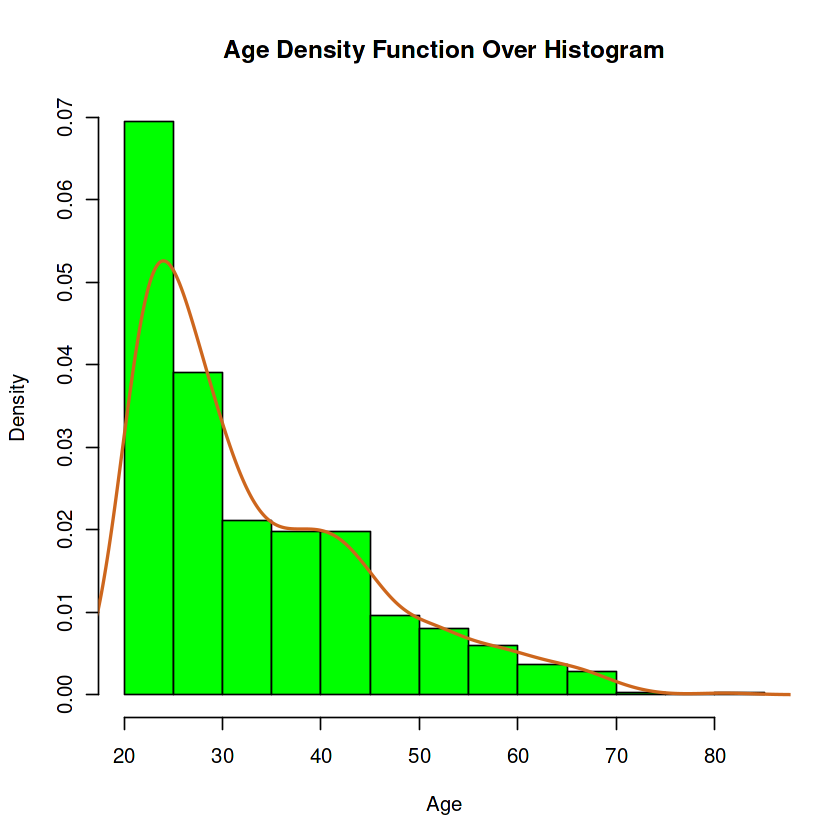

In [32]:
## Probability Density Function Histogram Plot
hist(diabetes_df$Age,
	col="green",
	border="black",
	prob = TRUE,
	xlab = "Age",
	main = "Age Density Function Over Histogram")

lines(density(diabetes_df$Age),
	lwd = 2,
	col = "chocolate3")
